# Exercise 1

In [1]:
import numpy as np
in_dir = 'data/'
txt_name = 'irisdata.txt'

iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [2]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


# Exercise 2

In [3]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [4]:
# Find variance of each feature
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

print(f"Variance of sepal length: {var_sep_l}")
print(f"Variance of sepal width: {var_sep_w}")
print(f"Variance of petal length: {var_pet_l}")
print(f"Variance of petal width: {var_pet_w}")

Variance of sepal length: 0.12424897959183677
Variance of sepal width: 0.1436897959183674
Variance of petal length: 0.030159183673469384
Variance of petal width: 0.01110612244897959


# Exercise 3

In [5]:
# Custom covariance function
def compute_custom_covariance(a, b):
    a_centered = a - np.mean(a)
    b_centered = b - np.mean(b)
    return np.sum(a_centered * b_centered) / (len(a) - 1)

In [6]:
cov_sepal_length_width = compute_custom_covariance(sep_l, sep_w)
cov_sepal_petal_length = compute_custom_covariance(sep_l, pet_l)

print(f"Covariance between sepal length and sepal width: {cov_sepal_length_width}")
print(f"Covariance between sepal length and petal length: {cov_sepal_petal_length}")

Covariance between sepal length and sepal width: 0.09921632653061223
Covariance between sepal length and petal length: 0.016355102040816326


# Exercise 4

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

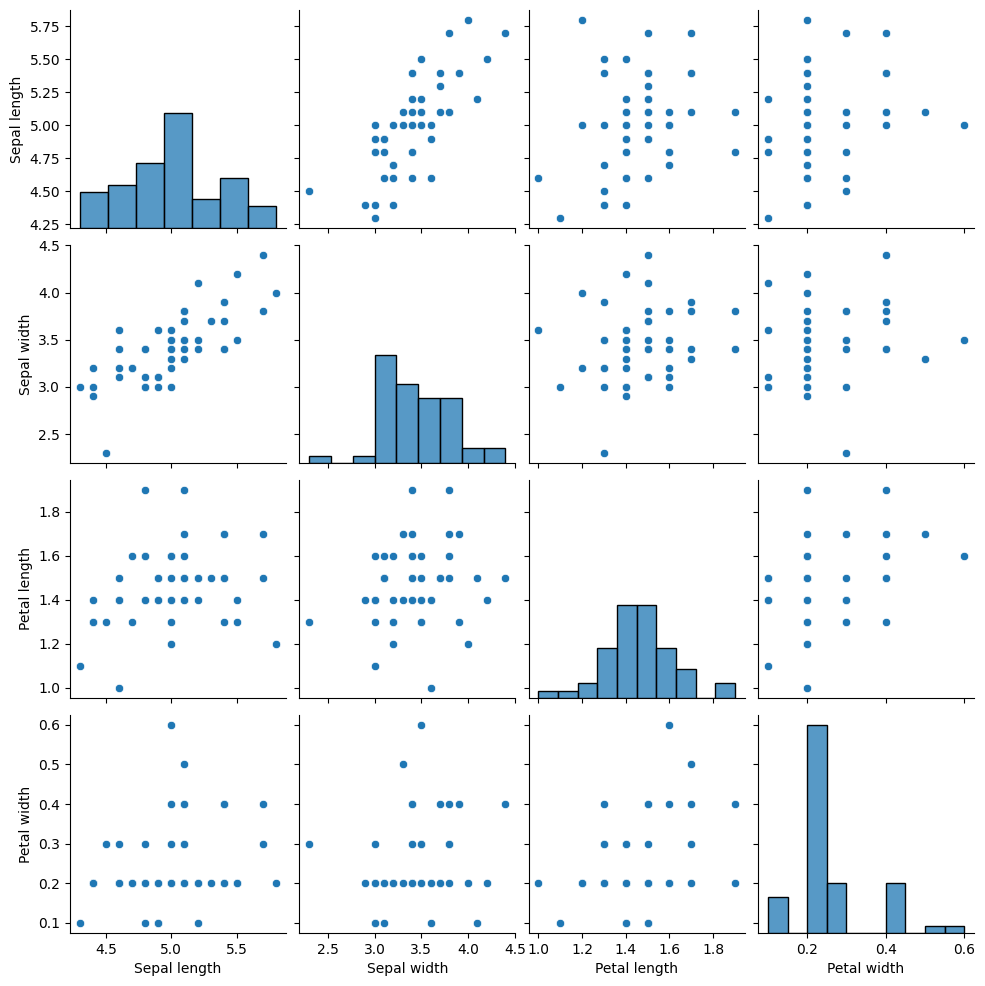

In [8]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

We can see that sepal width is linearly related to sepal length. This was also evident by covariance being positive (aka no inverse linearity) and the magnitude being bigger which meant that the linearity was stronger than sepal length vs petal length

# Exercise 5

In [9]:
mn = np.mean(x, axis=0)
data = x - mn

In [10]:
# Custom convariance computation
cx = 1/(len(data)-1) * np.dot(data.T, data)
cx

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [11]:
# Using numpy's built-in function
c_x = np.cov(x.T, bias=False)
c_x

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

They give the same result

# Exercise 6

In [12]:
values, vectors = np.linalg.eig(c_x)
print(f"Eigenvalues: {values}")
print(f"Eigenvectors: {vectors}")

Eigenvalues: [0.23645569 0.03691873 0.0267964  0.00903326]
Eigenvectors: [[ 0.6690784   0.59788401  0.43996277 -0.03607712]
 [ 0.73414783 -0.62067342 -0.27460747 -0.01955027]
 [ 0.0965439   0.49005559 -0.8324495  -0.23990129]
 [ 0.06356359  0.13093791 -0.19506751  0.96992969]]


# Exercise 7

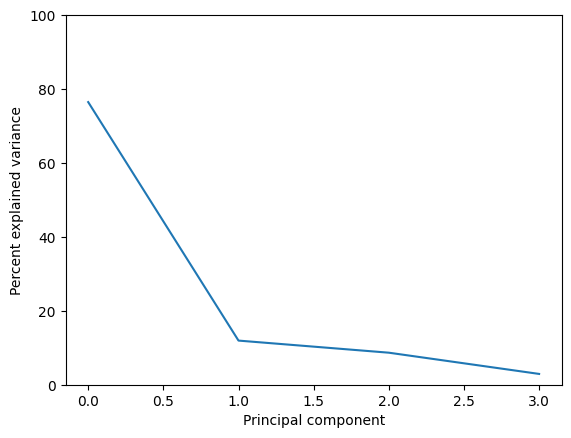

In [13]:
# Plot the amount of variance explained by each component
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

# Exercise 8

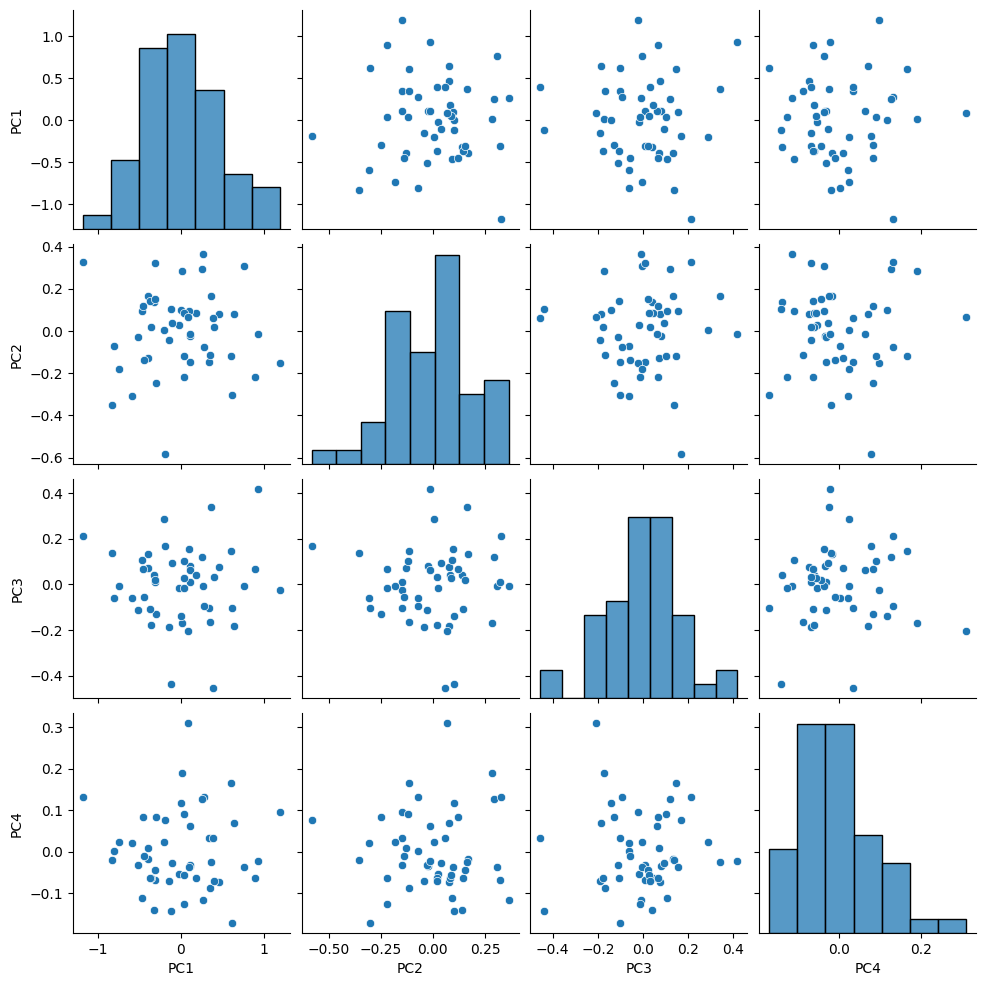

In [14]:
# Project onto PCA space using dot product
pc_proj = vectors.T.dot(data.T)

# Seaborn pairplot with projected data
d_proj = pd.DataFrame(pc_proj.T, columns=['PC1', 'PC2', 'PC3', 'PC4'])
sns.pairplot(d_proj)
plt.show()

Can't find any linearity in the structure

# Exercise 9

In [15]:
from sklearn import decomposition

In [16]:
# Computer PCA
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)

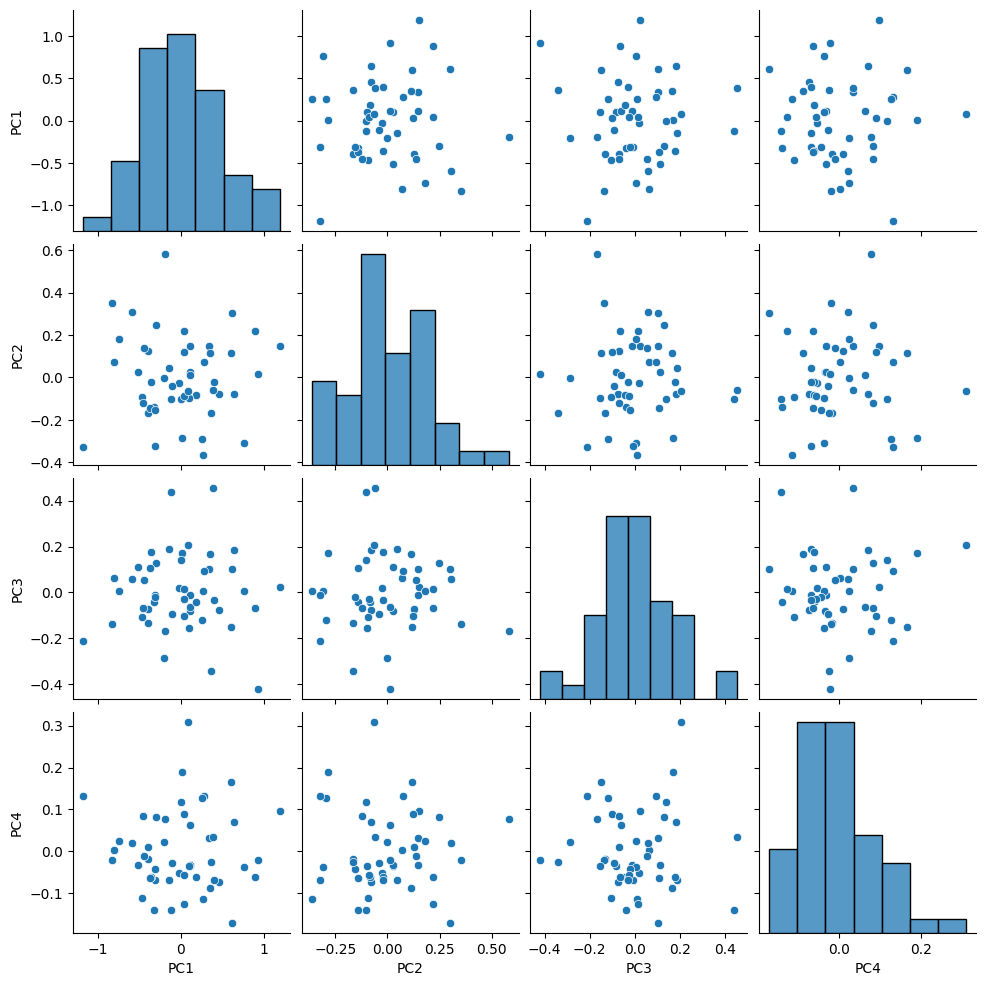

In [17]:
# Seaborn pairplot with projected data
d_proj = pd.DataFrame(data_transform, columns=['PC1', 'PC2', 'PC3', 'PC4'])
sns.pairplot(d_proj)
plt.show()

PC2 looks to be transpoed?